In [1]:
### 常规分析包
import os
import time
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm, pearsonr, spearmanr
from scipy.spatial import distance
### 绘图包
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42 # 输出PDF文字可编辑
### 其他
import cloudpickle as pickle
import warnings
warnings.filterwarnings("ignore") # 报错提示
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' #last_expr

# 1. Microbial dynamic change patterns

TcGSA

# 2. Correlation

In [3]:
tcgsa = pd.read_csv('../Results/2.1.1. TcGSA_ASV_rel(0.1S4P5EC).csv', index_col=0)
tcgsa.shape
tcgsa.head(2)

(310, 28)

1         2         3         4  \
3303dcf065483fbf1a02ff00a59b7848  0.868041  1.127654  1.338262  1.482767   
44c9f59231dd703269388032da1d5a98  0.896473  1.143516  1.341858  1.474706   

                                         5         6         7         8  \
3303dcf065483fbf1a02ff00a59b7848  1.500521  1.372479  1.173388  0.980821   
44c9f59231dd703269388032da1d5a98  1.481714  1.343840  1.134613  0.930088   

                                         9        10  ...        19        20  \
3303dcf065483fbf1a02ff00a59b7848  0.869184  0.881701  ...  2.381668  2.446145   
44c9f59231dd703269388032da1d5a98  0.803492  0.798238  ...  2.240409  2.313456   

                                        21        22        23        24  \
3303dcf065483fbf1a02ff00a59b7848  2.533824  2.708566  2.864747  2.879094   
44c9f59231dd703269388032da1d5a98  2.406466  2.582573  2.741246  2.765766   

                                        25        26        27  Cluster  
3303dcf065483fbf1a02ff00a59b7848  2.617276  2.061066  1.327369        1  
44c9f59231dd703269388032da1d5a98  2.528348  2.013547  1.330654        1  

[2 rows x 28 columns]

In [4]:
ClusrMeds = pd.read_csv('../Results/2.1.1. TcGSA_ASV_rel(0.1S4P5EC)_ClusrMeds.csv', index_col=0)
corr = pd.DataFrame(np.ones([ClusrMeds.shape[1], ClusrMeds.shape[1]]), columns=ClusrMeds.columns, index=ClusrMeds.columns)
pval = pd.DataFrame(np.ones([ClusrMeds.shape[1], ClusrMeds.shape[1]]), columns=ClusrMeds.columns, index=ClusrMeds.columns)
for i in range(ClusrMeds.shape[1]-1):
    for j in range(i+1, ClusrMeds.shape[1]):
        r, p = spearmanr(ClusrMeds.iloc[:, i], ClusrMeds.iloc[:, j])
        corr.iloc[i, j] = r
        pval.iloc[i, j] = p
        corr.iloc[j, i] = r
        pval.iloc[j, i] = p

In [7]:
meta = pd.read_csv('../Data_preprocess/1.1.MetaData.tsv', sep='\t', index_col=0)
alpha_diversitys = pd.read_csv('../Results/1.2. Alpha_diversitys.csv', index_col=0)
alpha_diversitys['log_Faith_PD'] = np.log10(alpha_diversitys['Faith_PD'])
alpha_diversitys['Time'] = meta.loc[alpha_diversitys.index, 'Time']
alpha_diversitys = alpha_diversitys.loc[alpha_diversitys['Time']!='M', :]
alpha_diversitys['Time'] = [int(i[1:]) for i in alpha_diversitys['Time']]
alpha_diversitys = alpha_diversitys.groupby('Time').mean()
alpha_diversitys.head(2)

Childs = [1, 4, 5, 11, 12, '13L', '13S', 14, 15, 18, 19, 21, 25, 26, 28, 29, 31, 32, 33, 34, 35]
family_links = {}
for c in Childs:
    MID = meta.loc[meta['Child_ID']==str(c), 'MotherID'].values[0]
    CIDs = meta.loc[meta['Child_ID']==str(c), :].index.values
    if str(MID).upper()!='NAN':
        family_links[c] = [MID, CIDs]

distance_matrix = pd.read_csv('../Results/1.3. Beta_unweighted_unifrac_matrix.csv', index_col=0)
beta_uw = []
for MID, CIDs in family_links.values():
    for CID in CIDs:
        t = int(CID.split('_')[-1])
        dis = distance_matrix.loc[MID, CID]
        beta_uw.append([t, MID, CID, dis])
beta_uw = pd.DataFrame(beta_uw, columns=['Time', 'MID', 'CID', 'distance'])
beta_uw = beta_uw.groupby('Time').mean()
beta_uw.head(2)

distance_matrix = pd.read_csv('../Results/1.3. Beta_weighted_unifrac_matrix.csv', index_col=0)
beta_w = []
for MID, CIDs in family_links.values():
    for CID in CIDs:
        t = int(CID.split('_')[-1])
        dis = distance_matrix.loc[MID, CID]
        beta_w.append([t, MID, CID, dis])
beta_w = pd.DataFrame(beta_w, columns=['Time', 'MID', 'CID', 'distance'])
beta_w = beta_w.groupby('Time').mean()
beta_w.head(2)

feast = pd.read_csv('../Results/1.4. FEAST_ASV.csv', index_col=1)
feast['Time'] = [int(i[1:]) for i in meta.loc[feast.index, 'Time']]
feast = feast.groupby('Time').mean()
feast.head(2)

Chao1   Shannon   Simpson    Observed  Dominance   Faith_PD  \
Time                                                                     
1     831.872308  8.875245  0.997095  808.000000   0.002905  55.877213   
2     151.010204  5.538444  0.961721  148.928571   0.038279  11.734467   

      log_Faith_PD  
Time                
1         1.744847  
2         0.805809

distance
Time          
1     0.766238
2     0.802660

distance
Time          
1     0.619978
2     0.609001

Unnamed: 0  Mother effect   Unknown
Time                                     
1     237.500000       0.073847  0.926153
2     169.818182       0.096501  0.903499

In [9]:
corr2 = pd.DataFrame(np.ones([5, ClusrMeds.shape[1]]), columns=ClusrMeds.columns, 
                     index=['Chao1', 'Shannon', 'log10(Faith PD)', 'Unweighted unifrac', 'Mother effect'])
pval2 = pd.DataFrame(np.ones([5, ClusrMeds.shape[1]]), columns=ClusrMeds.columns, 
                     index=['Chao1', 'Shannon', 'log10(Faith PD)', 'Unweighted unifrac', 'Mother effect'])
for i in range(1, ClusrMeds.shape[1]):
    r, p = spearmanr(ClusrMeds.iloc[:, i], alpha_diversitys['Chao1'])
    corr2.loc['Chao1', str(i)] = r
    pval2.loc['Chao1', str(i)] = p
    r, p = spearmanr(ClusrMeds.iloc[:, i], alpha_diversitys['Shannon'])
    corr2.loc['Shannon', str(i)] = r
    pval2.loc['Shannon', str(i)] = p
    r, p = spearmanr(ClusrMeds.iloc[:, i], alpha_diversitys['log_Faith_PD'])
    corr2.loc['log10(Faith PD)', str(i)] = r
    pval2.loc['log10(Faith PD)', str(i)] = p
    r, p = spearmanr(ClusrMeds.iloc[:, i], beta_w['distance'])
    corr2.loc['Weighted unifrac', str(i)] = r
    pval2.loc['Weighted unifrac', str(i)] = p
    r, p = spearmanr(ClusrMeds.iloc[:, i], beta_uw['distance'])
    corr2.loc['Unweighted unifrac', str(i)] = r
    pval2.loc['Unweighted unifrac', str(i)] = p
    r, p = spearmanr(ClusrMeds.iloc[:, i], feast['Mother effect'])
    corr2.loc['Mother effect', str(i)] = r
    pval2.loc['Mother effect', str(i)] = p

In [10]:
corr = pd.concat([corr2, corr], axis=0, sort=False)
pval = pd.concat([pval2, pval], axis=0, sort=False)

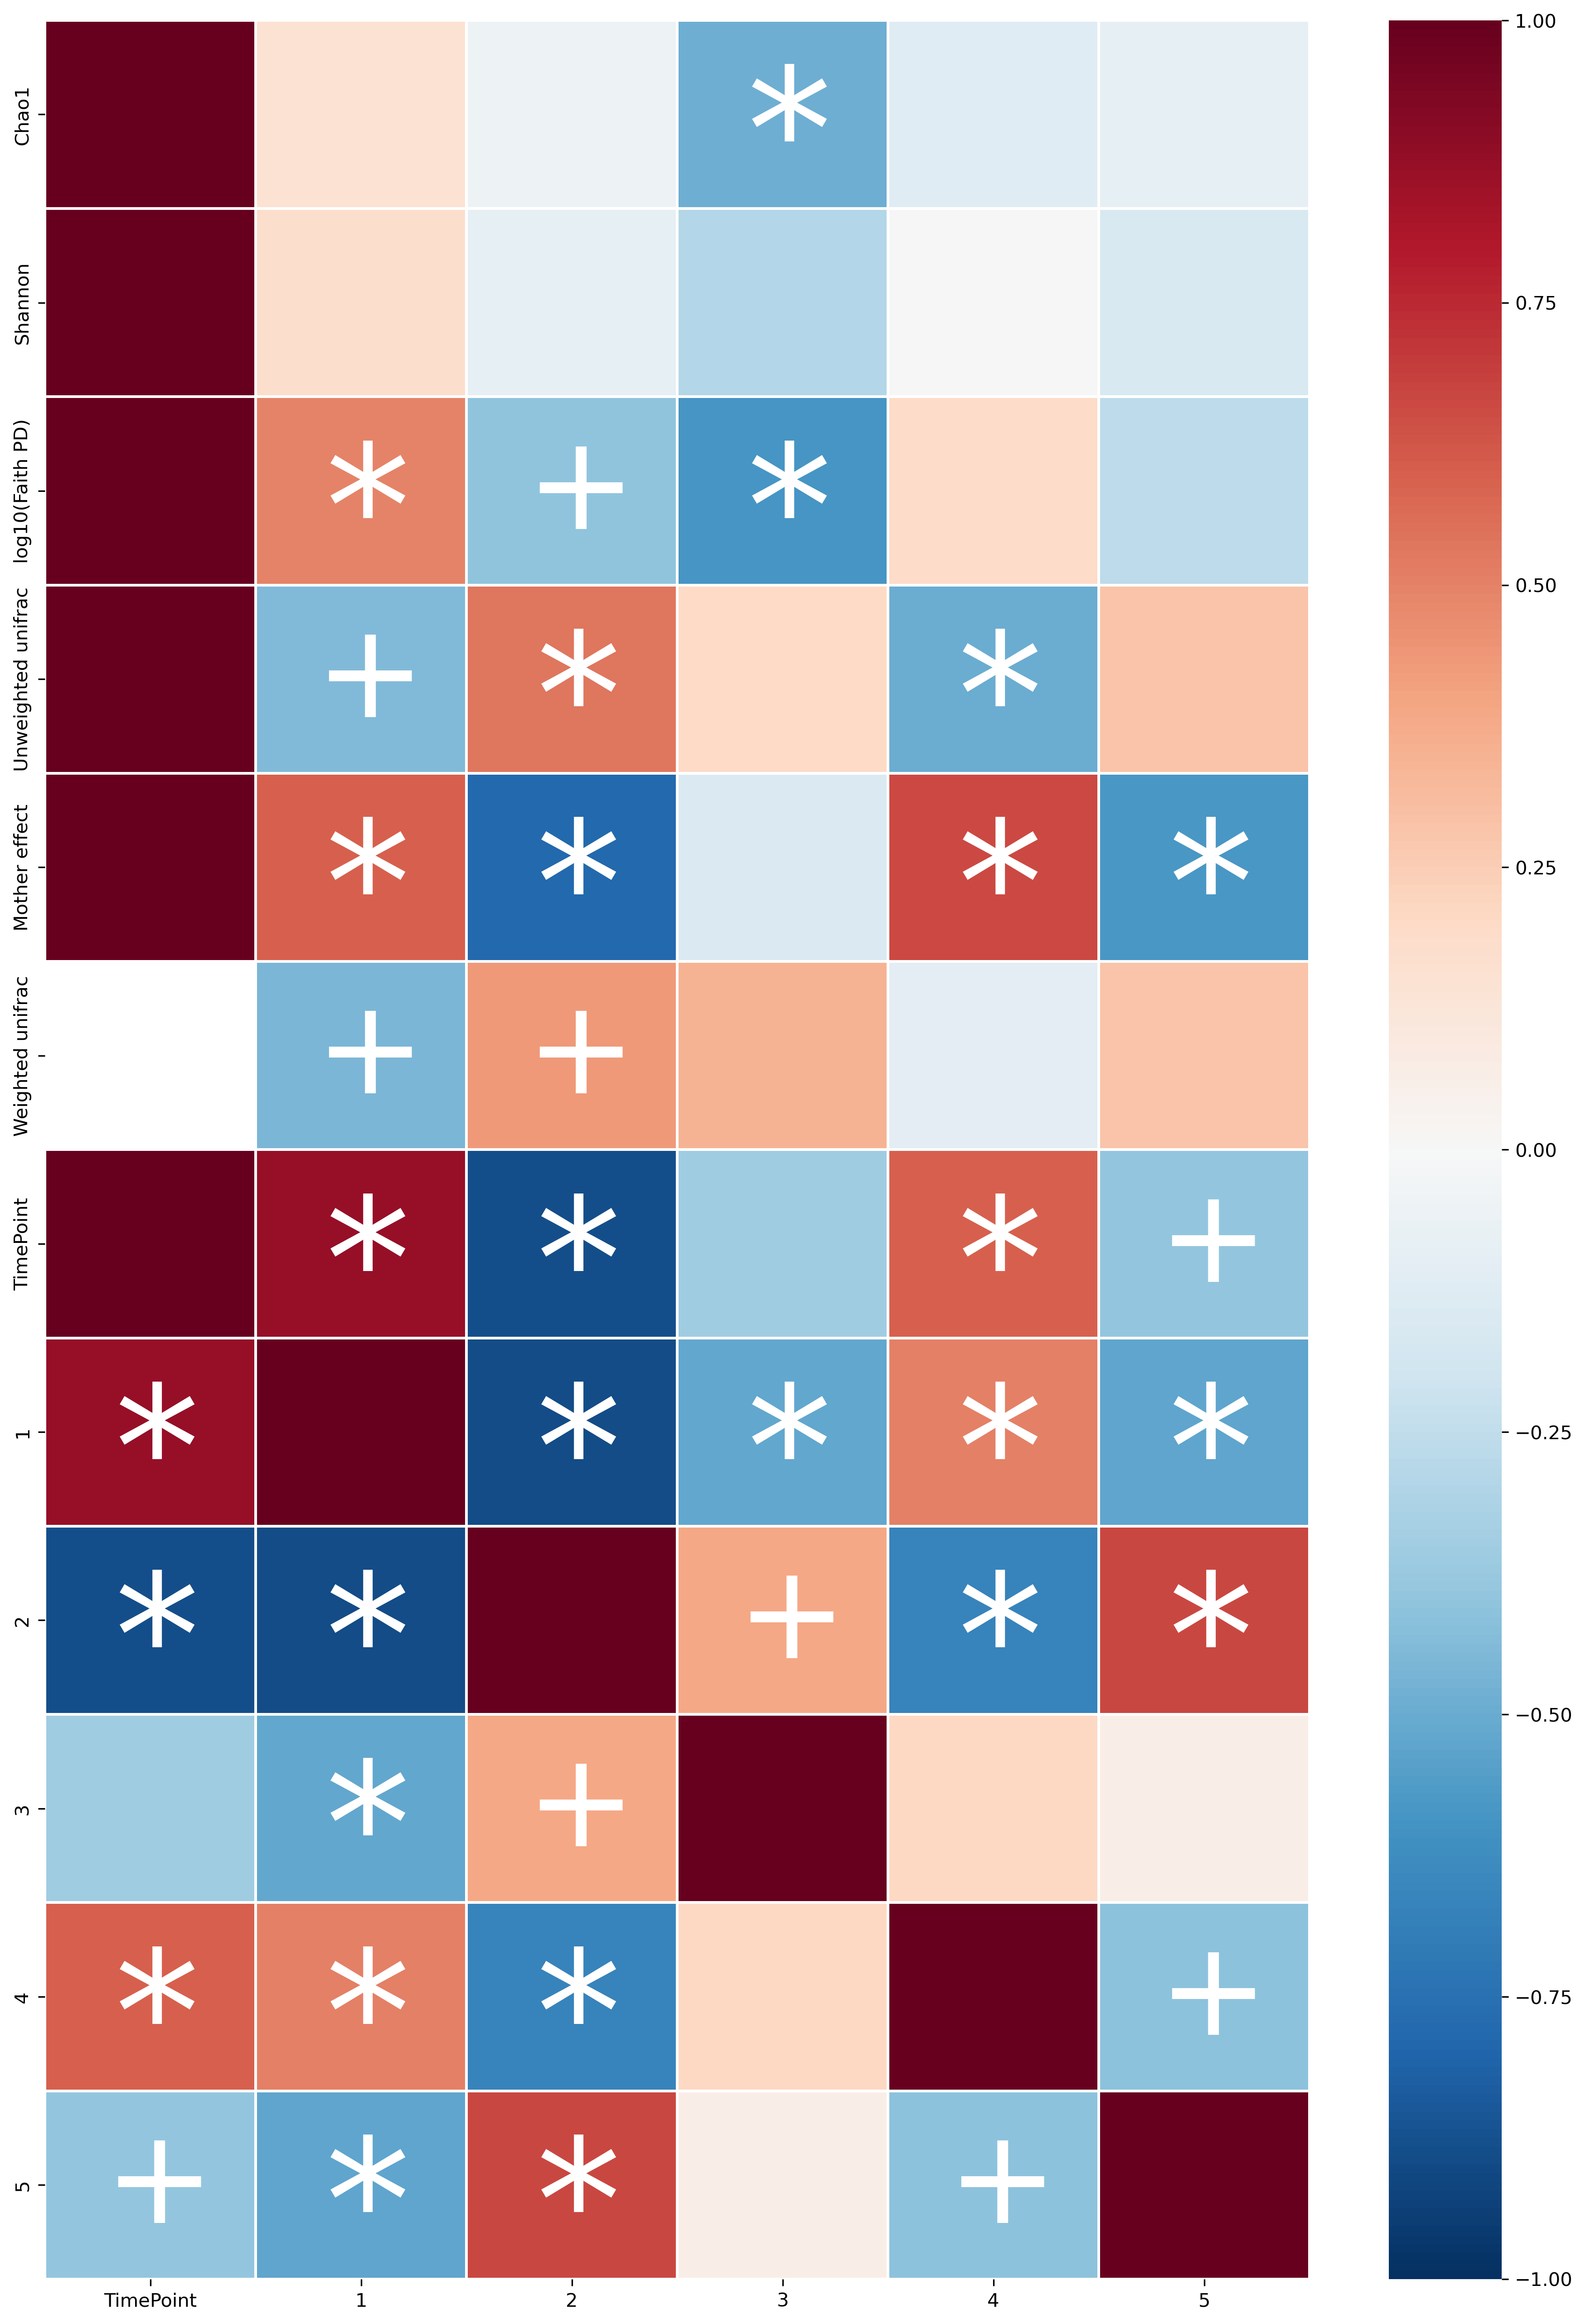

In [11]:
fig = plt.figure(figsize=(15, 22), dpi=300)
h = sns.heatmap(corr, cmap='RdBu_r', vmin=-1, vmax=1, cbar=True, lw=1)
_ = h.set_ylim(corr.shape[0], -0.0)
# -log P-value
for i in range(pval.shape[0]):
    for j in range(pval.shape[1]):
        p = pval.iloc[i, j]
        if p<=0.01:
            _ = plt.annotate('*', [j+0.33, i+0.9], c='white', fontsize=90)
        elif p<=0.05:
            _ = plt.annotate('+', [j+0.28, i+0.7], c='white', fontsize=70)
        else:
            pass
fig.savefig('../Results_0609/6.2. TcGSA_ASV_rel(0.1S4P5EC)_correlation.pdf', dpi=300)

# 3. Dynamic patterns

In [12]:
tcgsa = pd.read_csv('../Results/3.1. TcGSA_Path_rel(5EC).csv', index_col=0)
tcgsa.head(2)

1         2         3  \
pathway                                                                
1CMET2-PWY                              0.576407  0.556314  0.538253   
3-HYDROXYPHENYLACETATE-DEGRADATION-PWY  0.004388  0.020876  0.036047   

                                               4         5         6  \
pathway                                                                
1CMET2-PWY                              0.524259  0.516365  0.515585   
3-HYDROXYPHENYLACETATE-DEGRADATION-PWY  0.048584  0.057172  0.061129   

                                               7         8         9  \
pathway                                                                
1CMET2-PWY                              0.518859  0.522111  0.522543   
3-HYDROXYPHENYLACETATE-DEGRADATION-PWY  0.062314  0.063221  0.065571   

                                              10  ...        19        20  \
pathway                                           ...                       
1CMET2-PWY                              0.522491  ...  0.523548  0.539502   
3-HYDROXYPHENYLACETATE-DEGRADATION-PWY  0.067987  ...  0.084382  0.071773   

                                              21        22        23  \
pathway                                                                
1CMET2-PWY                              0.553756  0.561373  0.565104   
3-HYDROXYPHENYLACETATE-DEGRADATION-PWY  0.060146  0.053307  0.049326   

                                              24        25        26  \
pathway                                                                
1CMET2-PWY                              0.569622  0.579599  0.597542   
3-HYDROXYPHENYLACETATE-DEGRADATION-PWY  0.044837  0.036481  0.022444   

                                              27  Cluster  
pathway                                                    
1CMET2-PWY                              0.619980        1  
3-HYDROXYPHENYLACETATE-DEGRADATION-PWY  0.005202        2  

[2 rows x 28 columns]

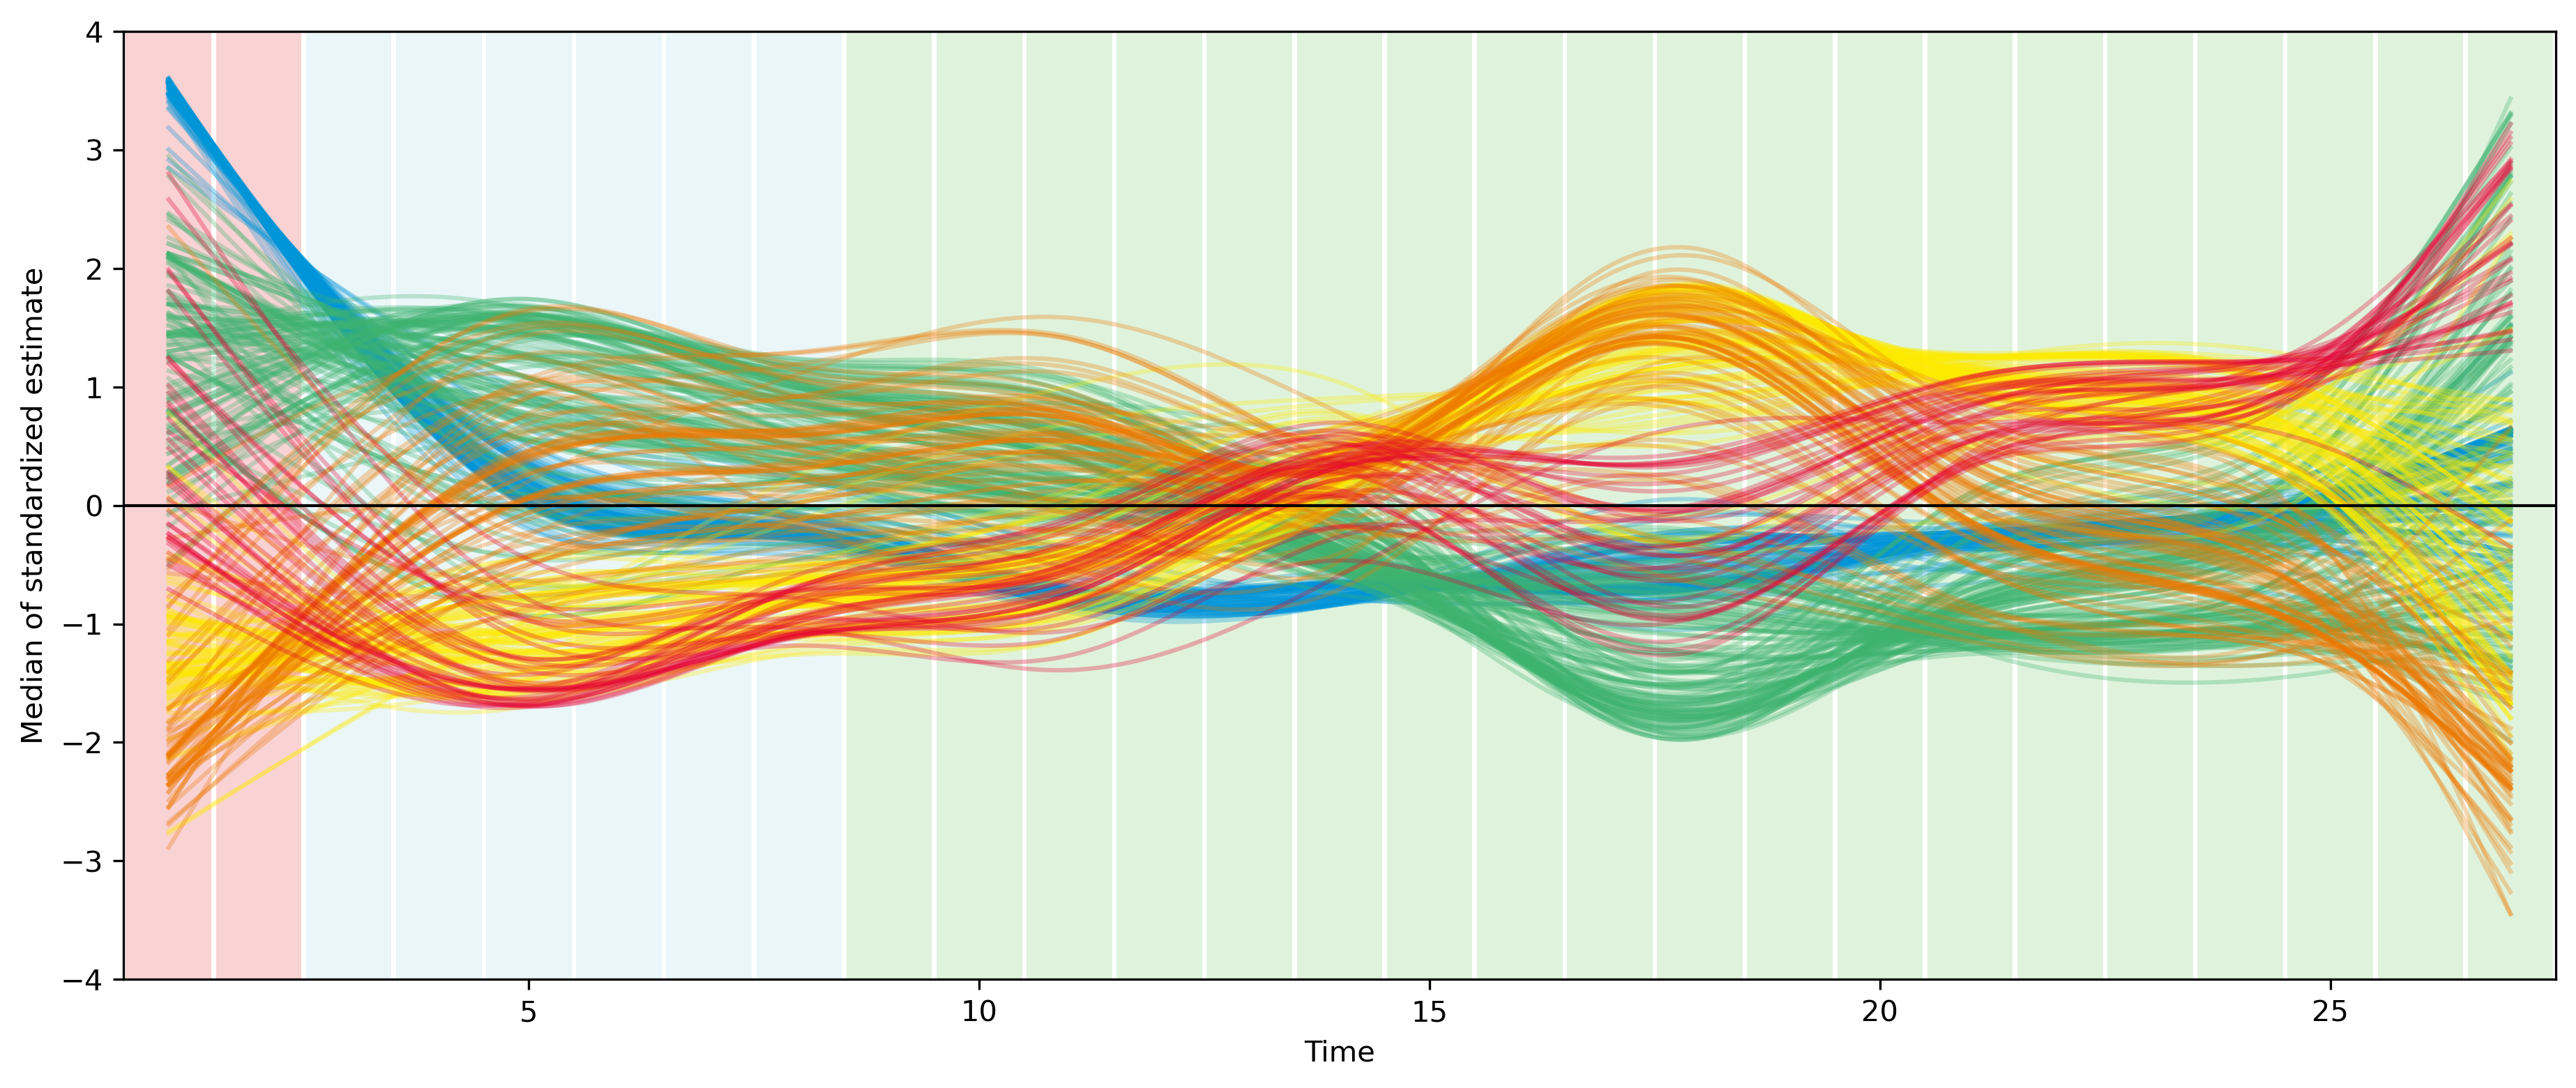

In [27]:
from scipy.interpolate import make_interp_spline
fig = plt.figure(figsize=(15, 6), dpi=300)
time = np.array([int(j) for j in tcgsa.columns[:-1]])
colormap = lambda x: '#ec6d71' if x<3 else ('#98d98e' if x>8 else '#bce2e8')
_ = plt.bar(x=time, bottom=[-4 for i in time], height=[8.0 for i in time],
            width=0.95, color=[colormap(i) for i in time], zorder=-99, alpha=0.3)
colors = ['#e60033', '#ee7800', '#ffea00', '#3eb370', '#0095d9', '#165e83', '#884898']
for cluster in range(1, 7):
    color = colors[cluster-1]
    temp = tcgsa.loc[tcgsa['Cluster']==cluster, :].iloc[:, :-1]
    for i in temp.index:
        values = temp.loc[i, :].values
        values = (values-values.mean())/values.std()
        #_ = plt.scatter(time, values, fc='white', ec=color, s=5, alpha=0.5, zorder=10)
        #_ = plt.plot(time, values, color=color, alpha=0.3)
        xnew = np.linspace(time.min(), time.max(),300)
        power_smooth = make_interp_spline(time, values)(xnew)
        _ = plt.plot(xnew, power_smooth, color=color, alpha=0.3, zorder=-cluster)
        
_ = plt.hlines(y=0, xmin=0.5, xmax=27.5, color='k', lw=1)
_ = plt.xlim(0.5, 27.5)
_ = plt.ylim(-4, 4)
_ = plt.xlabel('Time')
_ = plt.ylabel('Median of standardized estimate')
fig.savefig('../Results_0609/6.3. TcGSA_Pathway_rel(5EC).pdf', dpi=300)

In [14]:
anno = pd.read_csv('../Data/16S/picrust2_out_pipeline/pathways_out/MetaCYC_annotation.tsv', sep='\t', index_col=0)
anno = anno.loc[tcgsa.index, :]
anno = anno.drop_duplicates()
anno.shape

level2pathway = {}
for i in set(tcgsa.index):
    if type(anno.loc[i, 'Annotation'])!=str:
        levels = []
        for j in anno.loc[i, 'Annotation']:
            levels.append(j.split(';'))
    else:
        levels = [anno.loc[i, 'Annotation'].split(';')]
    for j in levels:
        if j[1].strip()=='L_2__Superpathways':
            continue
        level2pathway[j[2]] = level2pathway.get(j[2], set())
        level2pathway[j[2]].add(i)
len(level2pathway)

(676, 2)

58

In [16]:
pathdata = pd.read_csv('../Data/16S/picrust2_out_pipeline/pathways_out/path_abun_unstrat.tsv', sep='\t', index_col=0)
pathdata.columns = ['C11_10' if i=='11_10' else i for i in pathdata.columns]
data_level = pd.DataFrame(columns=pathdata.columns)
for level, paths in level2pathway.items():
    data_level.loc[level, :] = pathdata.loc[paths, :].sum().values
data_level_rel = data_level/data_level.sum()*100
path_order = data_level_rel.mean(1).sort_values(ascending=False).index
path_order[:15]

Index(['L_3__Amino Acid Biosynthesis',
       'L_3__Cofactor, Prosthetic Group, Electron Carrier, and Vitamin Biosynthesis',
       'L_3__Nucleoside and Nucleotide Biosynthesis',
       'L_3__Fatty Acid and Lipid Biosynthesis', 'L_3__Fermentation',
       'L_3__Carbohydrate Biosynthesis', 'L_3__Cell Structure Biosynthesis',
       'L_3__Carbohydrate Degradation', 'L_3__Carboxylate Degradation',
       'L_3__Secondary Metabolite Degradation',
       'L_3__Secondary Metabolite Biosynthesis',
       'L_3__Nucleoside and Nucleotide Degradation', 'L_3__TCA cycle',
       'L_3__Glycolysis', 'L_3__C1 Compound Utilization and Assimilation'],
      dtype='object')

In [31]:
pid2class = {}
top_pids = set()
for pclass in path_order[:15]:
    pids = level2pathway[pclass]
    #pclass, len(pids)
    top_pids.update(pids)
    for pid in pids:
        pid2class[pid] = pclass
for pid in tcgsa.index:
    if pid not in top_pids:
        pid2class[pid] = 'Others'
path_class = list(path_order[:15]) + ['Others']
path_class

['L_3__Amino Acid Biosynthesis',
 'L_3__Cofactor, Prosthetic Group, Electron Carrier, and Vitamin Biosynthesis',
 'L_3__Nucleoside and Nucleotide Biosynthesis',
 'L_3__Fatty Acid and Lipid Biosynthesis',
 'L_3__Fermentation',
 'L_3__Carbohydrate Biosynthesis',
 'L_3__Cell Structure Biosynthesis',
 'L_3__Carbohydrate Degradation',
 'L_3__Carboxylate Degradation',
 'L_3__Secondary Metabolite Degradation',
 'L_3__Secondary Metabolite Biosynthesis',
 'L_3__Nucleoside and Nucleotide Degradation',
 'L_3__TCA cycle',
 'L_3__Glycolysis',
 'L_3__C1 Compound Utilization and Assimilation',
 'Others']

In [36]:
results = pd.DataFrame(index=path_class, columns=range(1, 6))
for c in range(1, 6):
    pids = list(tcgsa.loc[tcgsa['Cluster']==c, :].index)
    pclass = [pid2class[pid] for pid in pids]
    ratio = [pclass.count(pc)/float(len(pids)) for pc in path_class]
    #c, ratio
    results[c] = ratio

In [37]:
results

1         2  \
L_3__Amino Acid Biosynthesis                        0.058824  0.107692   
L_3__Cofactor, Prosthetic Group, Electron Carri...  0.176471  0.030769   
L_3__Nucleoside and Nucleotide Biosynthesis         0.058824  0.000000   
L_3__Fatty Acid and Lipid Biosynthesis              0.029412  0.015385   
L_3__Fermentation                                   0.088235  0.076923   
L_3__Carbohydrate Biosynthesis                      0.147059  0.015385   
L_3__Cell Structure Biosynthesis                    0.058824  0.000000   
L_3__Carbohydrate Degradation                       0.088235  0.015385   
L_3__Carboxylate Degradation                        0.058824  0.030769   
L_3__Secondary Metabolite Degradation               0.029412  0.092308   
L_3__Secondary Metabolite Biosynthesis              0.029412  0.046154   
L_3__Nucleoside and Nucleotide Degradation          0.058824  0.000000   
L_3__TCA cycle                                      0.029412  0.030769   
L_3__Glycolysis                                     0.000000  0.000000   
L_3__C1 Compound Utilization and Assimilation       0.029412  0.000000   
Others                                              0.058824  0.538462   

                                                           3         4  \
L_3__Amino Acid Biosynthesis                        0.032258  0.169355   
L_3__Cofactor, Prosthetic Group, Electron Carri...  0.311828  0.137097   
L_3__Nucleoside and Nucleotide Biosynthesis         0.010753  0.217742   
L_3__Fatty Acid and Lipid Biosynthesis              0.075269  0.056452   
L_3__Fermentation                                   0.010753  0.040323   
L_3__Carbohydrate Biosynthesis                      0.043011  0.040323   
L_3__Cell Structure Biosynthesis                    0.032258  0.072581   
L_3__Carbohydrate Degradation                       0.053763  0.032258   
L_3__Carboxylate Degradation                        0.021505  0.024194   
L_3__Secondary Metabolite Degradation               0.064516  0.000000   
L_3__Secondary Metabolite Biosynthesis              0.000000  0.040323   
L_3__Nucleoside and Nucleotide Degradation          0.032258  0.032258   
L_3__TCA cycle                                      0.043011  0.000000   
L_3__Glycolysis                                     0.000000  0.024194   
L_3__C1 Compound Utilization and Assimilation       0.021505  0.024194   
Others                                              0.247312  0.088710   

                                                           5  
L_3__Amino Acid Biosynthesis                        0.031250  
L_3__Cofactor, Prosthetic Group, Electron Carri...  0.156250  
L_3__Nucleoside and Nucleotide Biosynthesis         0.000000  
L_3__Fatty Acid and Lipid Biosynthesis              0.010417  
L_3__Fermentation                                   0.010417  
L_3__Carbohydrate Biosynthesis                      0.072917  
L_3__Cell Structure Biosynthesis                    0.020833  
L_3__Carbohydrate Degradation                       0.062500  
L_3__Carboxylate Degradation                        0.010417  
L_3__Secondary Metabolite Degradation               0.020833  
L_3__Secondary Metabolite Biosynthesis              0.041667  
L_3__Nucleoside and Nucleotide Degradation          0.010417  
L_3__TCA cycle                                      0.000000  
L_3__Glycolysis                                     0.010417  
L_3__C1 Compound Utilization and Assimilation       0.052083  
Others                                              0.489583

# 3. Functional annotation

In [49]:
ClusrMeds = pd.read_csv('../Results/2.1.1. TcGSA_ASV_rel(0.1S4P5EC)_ClusrMeds.csv', index_col=0)
ClusrMeds.index = ClusrMeds['TimePoint']
ClusrMeds = ClusrMeds.iloc[:, 1:]
ClusrMeds.head(2)

1         2         3         4         5
TimePoint                                                  
1         -0.684115 -0.174532 -1.636056 -0.562766 -0.360451
2         -0.750570  0.476257 -0.954842 -1.130979 -0.024060

In [50]:
pathdata = pd.read_csv('../Data/16S/picrust2_out_pipeline/pathways_out/path_abun_unstrat.tsv', sep='\t', index_col=0)
pathdata.columns = ['C11_10' if i=='11_10' else i for i in pathdata.columns]
pathdata = pathdata.loc[:, [i for i in pathdata.columns if i[0]=='C']].T
pathdata['Time'] = [int(t[1:]) for t in meta.loc[pathdata.index, 'Time']]
pathdata = pathdata.sort_values('Time').groupby('Time').mean()
pathdata.head(2)

pathway    1CMET2-PWY  3-HYDROXYPHENYLACETATE-DEGRADATION-PWY  \
Time                                                            
1        12861.861952                              461.726616   
2        13253.415410                              102.569624   

pathway  AEROBACTINSYN-PWY  ALL-CHORISMATE-PWY  ANAEROFRUCAT-PWY  \
Time                                                               
1                54.134972         4718.024237      16011.967476   
2                 8.305043         2662.533477      10824.201433   

pathway  ANAGLYCOLYSIS-PWY  ARG+POLYAMINE-SYN   ARGDEG-PWY  ARGORNPROST-PWY  \
Time                                                                          
1             16808.673101        5603.929409   743.178678      3323.485203   
2             19874.279376        4110.145693  1425.239492      1968.584785   

pathway    ARGSYN-PWY  ...   THISYN-PWY  THREOCAT-PWY   THRESYN-PWY  \
Time                   ...                                            
1        10994.761594  ...  9771.862473    664.347581  15081.995296   
2         9731.670227  ...  8506.628694    182.385549  17323.098713   

pathway  TRNA-CHARGING-PWY    TRPSYN-PWY  TYRFUMCAT-PWY   UBISYN-PWY  \
Time                                                                   
1             14939.542591  11638.308922    1419.618691  3133.935578   
2             15449.265458  14135.022073     226.595827  1868.589595   

pathway  UDPNAGSYN-PWY  VALDEG-PWY    VALSYN-PWY  
Time                                              
1         12188.467237  195.223489  15938.220657  
2         13533.340226    8.878128  17978.229758  

[2 rows x 412 columns]

In [51]:
from scipy.stats import pearsonr, spearmanr, kendalltau

def correlation_analysis_2_matrix(data1, data2, method=spearmanr, sampling=1000):
    '''
    # data1, data2 : two datasets with samples in index and features in column
    '''
    sample_overlap = set(data1.index)&set(data2.index)
    temp1 = data1.loc[sample_overlap, :]
    temp2 = data2.loc[sample_overlap, :]
    correlation_r_res = np.zeros((temp1.shape[1], temp2.shape[1]))
    correlation_p_res = np.ones((temp1.shape[1], temp2.shape[1]))
    for i in range(temp1.shape[1]):
        for j in range(temp2.shape[1]):
            r, p = method(temp1.iloc[:, i], temp2.iloc[:, j])
            correlation_r_res[i, j] = r
            correlation_p_res[i, j] = p
            if sampling:
                p = 0
                for rt in range(sampling):
                    x, y = list(temp1.iloc[:, i]), list(temp2.iloc[:, j])
                    np.random.shuffle(y)
                    rr, _ = method(x, y)
                    if rr > r:
                        p += 1
                p = min([p/float(sampling), 1-p/float(sampling)])
                correlation_p_res[i, j] = p
        print('###', temp1.shape[1], i)
    correlation_r_res = pd.DataFrame(correlation_r_res, index=temp1.columns, columns=temp2.columns)
    correlation_p_res = pd.DataFrame(correlation_p_res, index=temp1.columns, columns=temp2.columns)
    return correlation_r_res, correlation_p_res

r_res, p_res = correlation_analysis_2_matrix(ClusrMeds, pathdata, method=spearmanr, sampling=1000)

### 5 0
### 5 1
### 5 2
### 5 3
### 5 4


In [53]:
r_res.to_csv('../Results_0609/6.3. TcGSA_ASV2Pathway_corr.csv')
p_res.to_csv('../Results_0609/6.3. TcGSA_ASV2Pathway_pval.csv')

In [78]:
r_res_ = r_res.loc[:, (r_res.abs().max()>=0.7)&(p_res.min()<0.05)]
p_res_ = p_res.loc[:, (r_res.abs().max()>=0.7)&(p_res.min()<0.05)]
r_res_.shape

(5, 114)

<Figure size 900x7500 with 0 Axes>

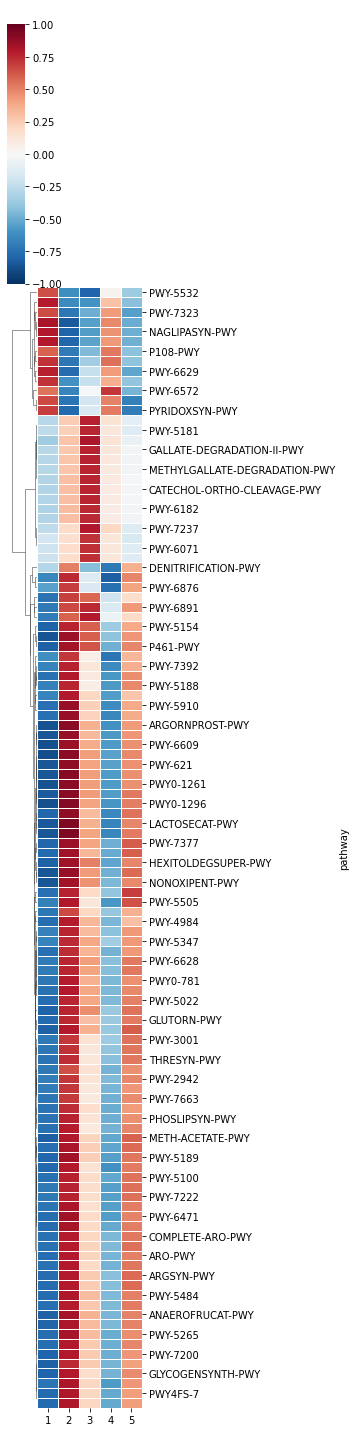

In [79]:
fig = plt.figure(figsize=(3, 25), dpi=300)
h = sns.clustermap(r_res_.T, cmap='RdBu_r', vmin=-1, vmax=1, cbar=True, lw=1, col_cluster=False, figsize=(5, 20))
#_ = h.set_ylim(r_res_.T.shape[0], -0.0)


### ASV - pathway enrichment

In [81]:
tcgsa = pd.read_csv('../Results/2.1.1. TcGSA_ASV_rel(0.1S4P5EC).csv', index_col=0)
tcgsa.shape
tcgsa.head(2)

(310, 28)

1         2         3         4  \
3303dcf065483fbf1a02ff00a59b7848  0.868041  1.127654  1.338262  1.482767   
44c9f59231dd703269388032da1d5a98  0.896473  1.143516  1.341858  1.474706   

                                         5         6         7         8  \
3303dcf065483fbf1a02ff00a59b7848  1.500521  1.372479  1.173388  0.980821   
44c9f59231dd703269388032da1d5a98  1.481714  1.343840  1.134613  0.930088   

                                         9        10  ...        19        20  \
3303dcf065483fbf1a02ff00a59b7848  0.869184  0.881701  ...  2.381668  2.446145   
44c9f59231dd703269388032da1d5a98  0.803492  0.798238  ...  2.240409  2.313456   

                                        21        22        23        24  \
3303dcf065483fbf1a02ff00a59b7848  2.533824  2.708566  2.864747  2.879094   
44c9f59231dd703269388032da1d5a98  2.406466  2.582573  2.741246  2.765766   

                                        25        26        27  Cluster  
3303dcf065483fbf1a02ff00a59b7848  2.617276  2.061066  1.327369        1  
44c9f59231dd703269388032da1d5a98  2.528348  2.013547  1.330654        1  

[2 rows x 28 columns]

In [80]:
contrib = pd.read_csv('../Data/16S/picrust2_out_pipeline/pathways_out/path_abun_contrib.tsv', sep='\t', index_col=0)
contrib.head(2)

function                             taxon  taxon_abun  \
sample                                                             
11_10   1CMET2-PWY  059ea9216ba6f212eed980718eef145a       150.0   
11_10   1CMET2-PWY  063da75909e54a4e4655e5f4a815643c       856.0   

        taxon_rel_abun  genome_function_count  taxon_function_abun  \
sample                                                               
11_10         1.565153               1.000000           150.000000   
11_10         8.931804               1.076923           921.846154   

        taxon_rel_function_abun  norm_taxon_function_contrib  
sample                                                        
11_10                  1.565153                     0.016229  
11_10                  9.618866                     0.099736

In [101]:
def enrich_analysis(term_in_kegg, term_in_pathway, term_in_target_set):
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html
    #################################################
    #                | in Set (Diff) |    Others    |
    # Pathway        |  a            |      b       |
    # Not in Pathway |  c            |      d       | 
    #################################################
    # term_in_kegg: KEGG中所有的term (KO, Compound...) (背景)
    # term_in_pathway : 某个pathway中对应的term (抽样)
    # term_in_target_set : 目标集合（比如，差异，聚类某类）中的term (目标)
    # M = a + b + c + d, n = a + b and N = a + c; 
    # [  x           n - x     ]
    # [N - x    M - (n + N) + x]
    k = len(set(term_in_pathway))
    x = len(set(term_in_pathway)&set(term_in_target_set))
    m_n = len(set(term_in_kegg))
    m = len(set(term_in_target_set)&set(term_in_kegg))
    N = len(set(term_in_target_set))
    n = len(set(term_in_pathway))
    M = len(set(term_in_kegg))
    ### 超几何分布：
    #oddsratio = float(a*d)/float(b*c)
    #p_value = stats.hypergeom.sf(x-1, M, n, N)
    # Table
    a = x
    b = n-x
    c = N-x
    d = M - (n + N) + x
    ### Fisher' excat test
    oddsratio, pvalue = stats.fisher_exact([[a, b], [c, d]], alternative='greater') # less, greater, two-sided
    return n, a, oddsratio, pvalue

pathways = list(set(contrib['function']))
all_asvs = set(tcgsa.index)
ors = pd.DataFrame(index=pathways, columns=range(1, 6))
pvals = pd.DataFrame(index=pathways, columns=range(1, 6))
len(pathways), len(all_asvs)
for cluster in range(1, 6):
    asv_in_cluster = set(tcgsa.loc[tcgsa['Cluster']==cluster, :].index)&all_asvs
    for pathway in pathways:
        asv_in_pathway = set(contrib.loc[contrib['function']==pathway, 'taxon'])&all_asvs
        n, a, oddsratio, pvalue = enrich_analysis(all_asvs, asv_in_pathway, asv_in_cluster)
        #pathway, oddsratio, pvalue
        ors.loc[pathway, cluster] = oddsratio
        pvals.loc[pathway, cluster] = pvalue
    cluster, 'done'

(379, 310)

(1, 'done')

(2, 'done')

(3, 'done')

(4, 'done')

(5, 'done')

In [102]:
ors.to_csv('../Results_0609/6.3. TcGSA_PathwayEnrich_OR.csv')
pvals.to_csv('../Results_0609/6.3. TcGSA_PathwayEnrich_pval.csv')

In [128]:
import statsmodels.stats.multitest as multi
pvals_ = pvals.copy()
for i in pvals_.columns:
    pvals_[i] = multi.multipletests(pvals_[i], method = 'fdr_bh')[1]

In [130]:
overlap_path = set(pathdata.columns)&set(pvals_.index)
len(overlap_path)

379

In [143]:
fdr_e_

1    2         3    4         5
PWY-5971                  1.0  1.0       1.0  1.0       1.0
PWY-7199                  1.0  1.0       0.0  1.0       1.0
PWY-7098                  1.0  1.0       1.0  1.0       1.0
PWY-7371                  1.0  1.0       1.0  1.0       1.0
PWY-5920                  1.0  1.0       1.0  1.0       1.0
...                       ...  ...       ...  ...       ...
PWY-5484             0.316602  1.0  0.048472  1.0       1.0
NAD-BIOSYNTHESIS-II       1.0  1.0       0.0  1.0       1.0
PWY-7184                  1.0  1.0       0.0  1.0  0.225807
PWY-6629                  0.0  1.0       1.0  1.0       1.0
PWY-7211                  1.0  1.0       0.0  1.0       1.0

[379 rows x 5 columns]

In [179]:
corr_r_ = r_res.T.loc[overlap_path, :]
corr_r_.columns = range(1, 6)
fdr_e_ = pvals_.loc[overlap_path, :]
select_path = []
for p in overlap_path:
    for c in corr_r_.columns:
        if corr_r_.loc[p, c]>=0.7 and fdr_e_.loc[p, c]<=10**(-5):
            select_path.append(p)
            break
len(select_path)

35

In [180]:
anno = pd.read_csv('../Data/16S/picrust2_out_pipeline/pathways_out/MetaCYC_annotation.tsv', sep='\t', index_col=0)
anno = anno.loc[select_path, :]
anno = anno.drop_duplicates()
anno.head(2)

Level                                         Annotation
ID                                                                
PWY-5910      3  L_1__Pathways;L_2__Biosynthesis;L_3__Cofactor,...
PWY-5910      3  L_1__Pathways;L_2__Biosynthesis;L_3__Secondary...

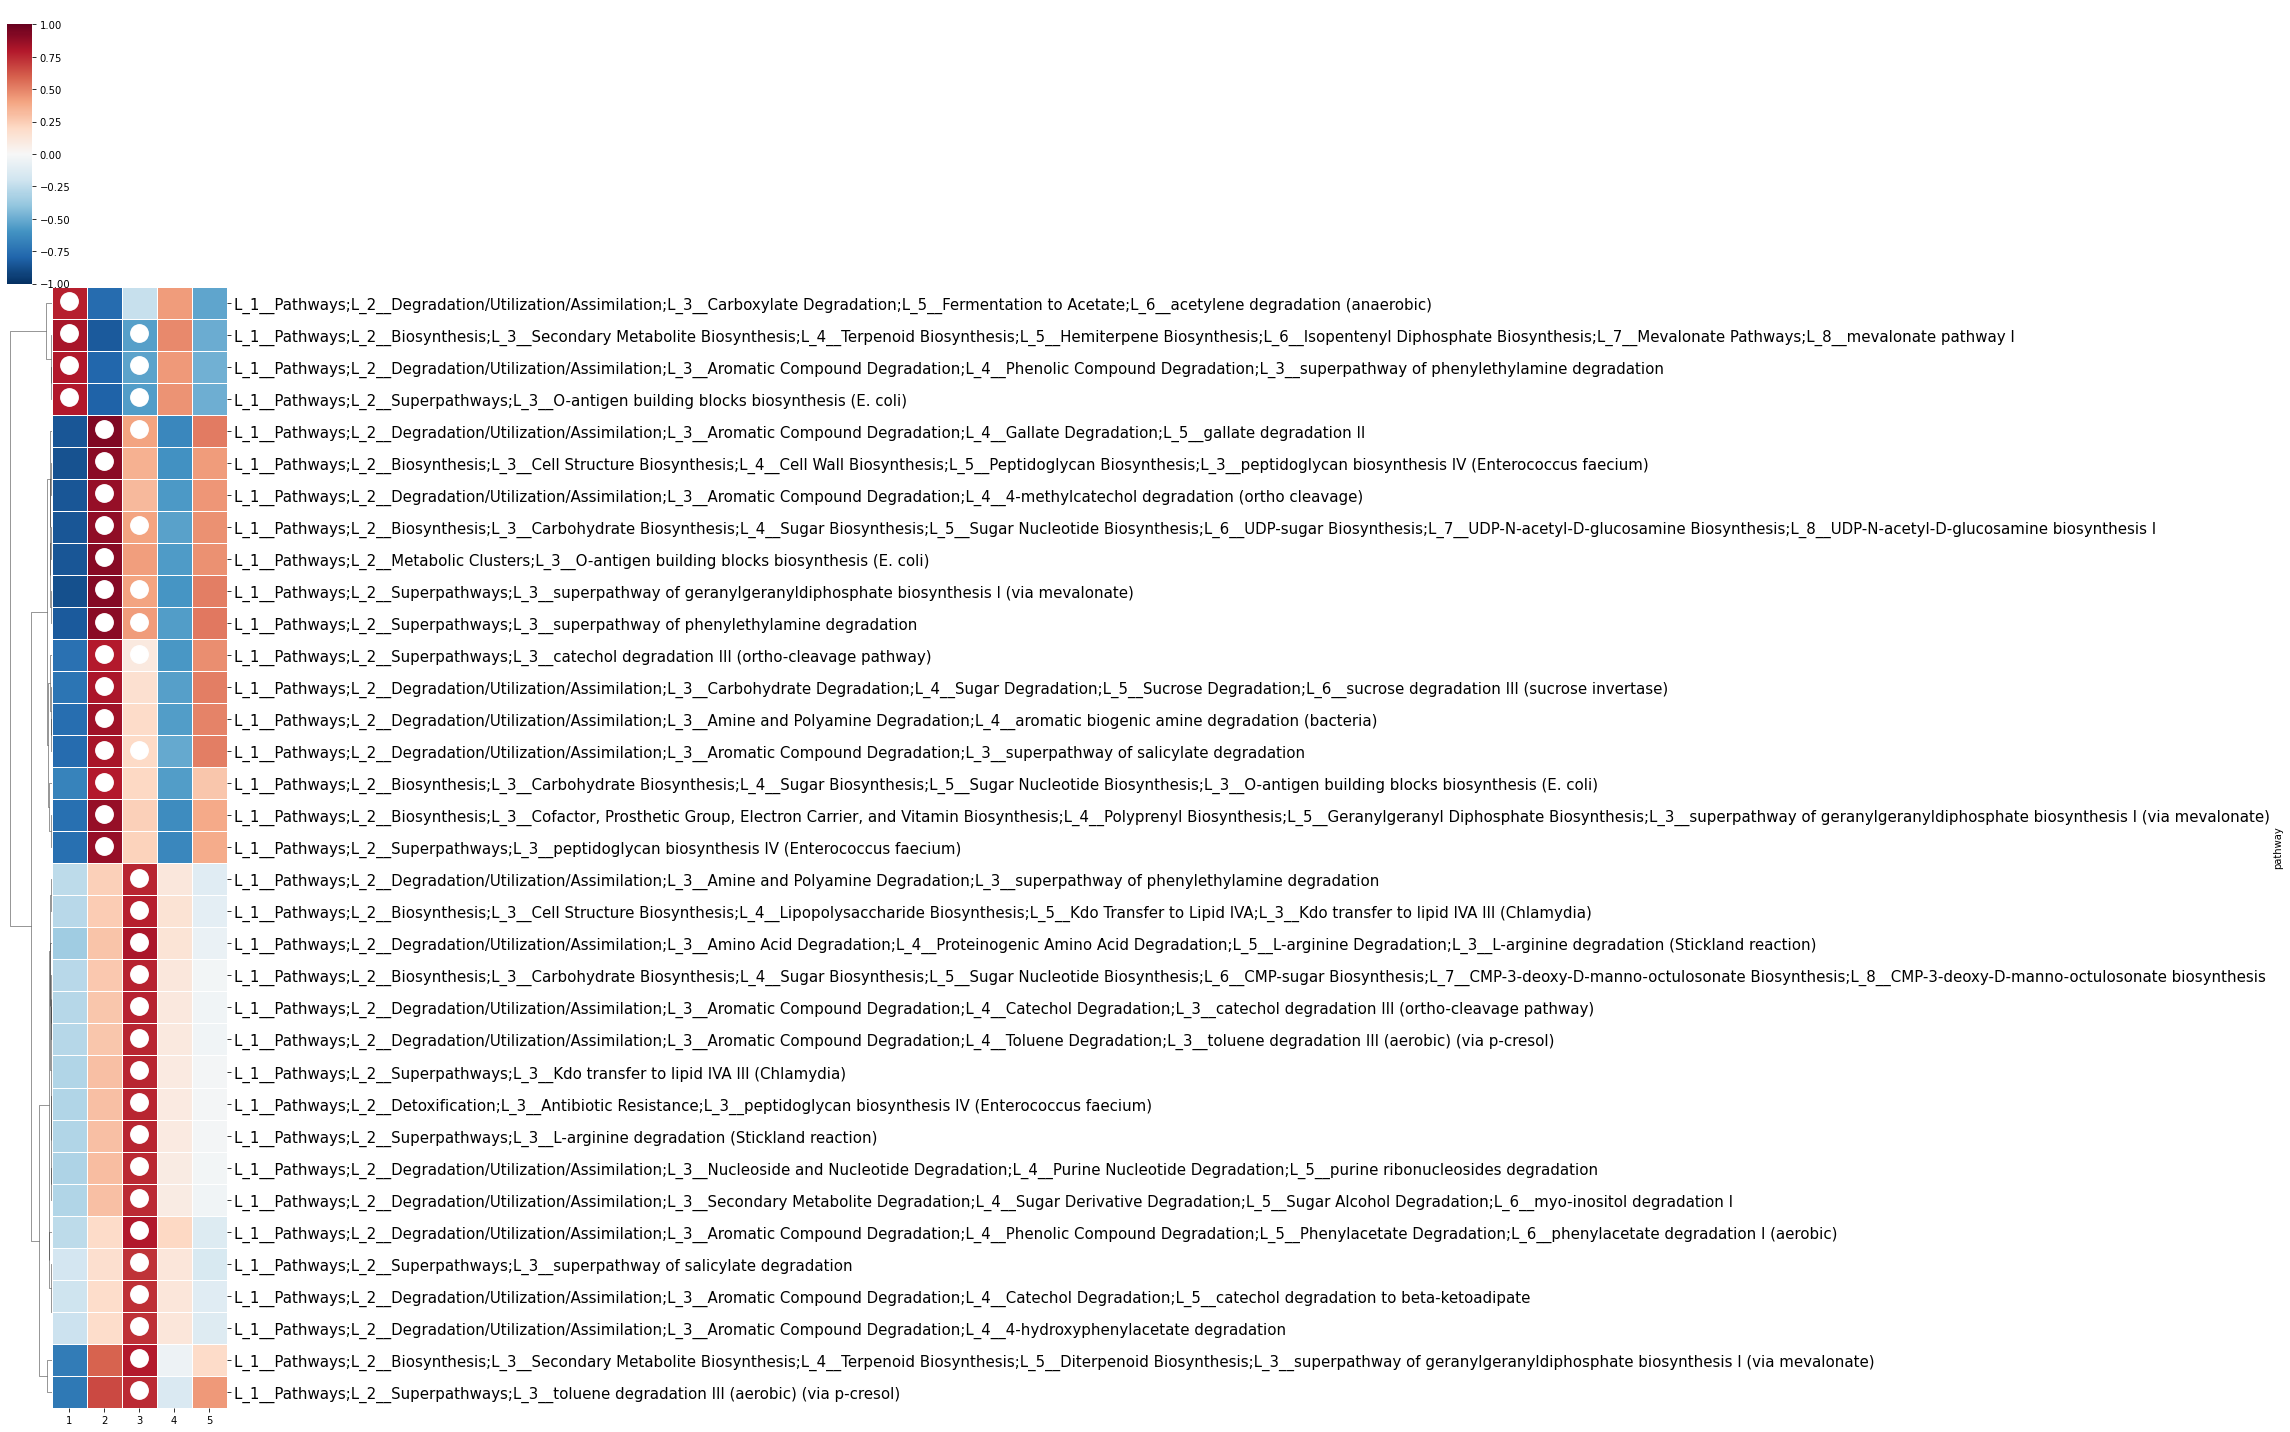

In [198]:
g = sns.clustermap(corr_r_.loc[select_path, :], cmap='RdBu_r', vmin=-1, vmax=1, cbar=True, lw=1, 
                   col_cluster=False, figsize=(7, 20))
#_ = h.set_ylim(r_res_.T.shape[0], -0.0)
_ = g.ax_heatmap.set_ylim(len(select_path), -0.0)
yticklabels = np.array(select_path)[g.dendrogram_row.reordered_ind]
yticklabels_ = np.array(anno['Annotation'])[g.dendrogram_row.reordered_ind]
_ = g.ax_heatmap.set_yticklabels(yticklabels_, fontsize=15)
xticklabels = [1, 2, 3, 4, 5]

### -log P-value
for mf in range(len(xticklabels)):
    for af in range(len(yticklabels)):
        p = fdr_e_.loc[select_path, :].loc[yticklabels[af], xticklabels[mf]]
        #_ = g.ax_heatmap.annotate('**' if p<=0.01 else ('*' if p<=0.05 else ''), 
        #                          (mf+(0.25 if p<=0.01 else 0.35), af+0.65), fontsize=9, color='k')
        if p<=0.01:
            _ = g.ax_heatmap.scatter([mf+0.5], [af+0.45], s=300, c='white', edgecolors='white', linewidths=1.5, alpha=1)
        elif p<=0.05:
            _ = g.ax_heatmap.scatter([mf+0.4], [af+0.5], s=300, facecolors='none', edgecolors='white', linewidths=1.5)
        else:
            pass
g.savefig('../Results_0609/6.3. TcGSA_PathwayEnrich(10-5).pdf', dpi=300)

Top 15 functions

In [209]:
pathdata = pd.read_csv('../Data/16S/picrust2_out_pipeline/pathways_out/path_abun_unstrat.tsv', sep='\t', index_col=0)
pathdata.columns = ['C11_10' if i=='11_10' else i for i in pathdata.columns]
pathdata = pathdata.loc[:, [i for i in pathdata.columns if i[0]=='C']].T

path_data_ = pd.DataFrame(index=pathdata.index, columns=path_class)
top_pids = set()
for pc in path_class:
    if pc!='Others':
        pids = level2pathway[pc]
        top_pids.update(pids)
    else:
        pids = set(pathdata.columns)-top_pids
    #pc, len(pids)
    path_data_[pc] = pathdata[pids].sum(1)

path_data_['Time'] = [int(t[1:]) for t in meta.loc[path_data_.index, 'Time']]
path_data_ = path_data_.sort_values('Time').groupby('Time').mean()
path_data_.head(2)

L_3__Amino Acid Biosynthesis  \
Time                                 
1                    374805.946452   
2                    385992.844631   

      L_3__Cofactor, Prosthetic Group, Electron Carrier, and Vitamin Biosynthesis  \
Time                                                                                
1                                         388374.511123                             
2                                         348898.811266                             

      L_3__Nucleoside and Nucleotide Biosynthesis  \
Time                                                
1                                   394998.747911   
2                                   414107.258094   

      L_3__Fatty Acid and Lipid Biosynthesis  L_3__Fermentation  \
Time                                                              
1                              214818.457007      134901.660431   
2                              186681.386410      109914.518310   

      L_3__Carbohydrate Biosynthesis  L_3__Cell Structure Biosynthesis  \
Time                                                                     
1                      133373.410963                     112477.936332   
2                      123581.310052                     109060.560480   

      L_3__Carbohydrate Degradation  L_3__Carboxylate Degradation  \
Time                                                                
1                      91814.005735                  72655.668828   
2                     103854.963763                  71788.457058   

      L_3__Secondary Metabolite Degradation  \
Time                                          
1                              48992.405792   
2                              43501.897494   

      L_3__Secondary Metabolite Biosynthesis  \
Time                                           
1                               66981.183934   
2                               66576.380389   

      L_3__Nucleoside and Nucleotide Degradation  L_3__TCA cycle  \
Time                                                               
1                                   63077.107687    63966.050686   
2                                   67575.507652    40739.767369   

      L_3__Glycolysis  L_3__C1 Compound Utilization and Assimilation  \
Time                                                                   
1        50594.038082                                   53946.752916   
2        47412.110959                                   34656.549802   

             Others  
Time                 
1     290834.975717  
2     224122.483683

In [217]:
r_res, p_res = correlation_analysis_2_matrix(ClusrMeds, path_data_, method=spearmanr, sampling=1000)
r_res.to_csv('../Results_0609/6.3. TcGSA_ASV2Pathway_top15_corr.csv')
p_res.to_csv('../Results_0609/6.3. TcGSA_ASV2Pathway_top15_pval.csv')

### 5 0
### 5 1
### 5 2
### 5 3
### 5 4


In [223]:
p_res

L_3__Amino Acid Biosynthesis  \
1                         0.000   
2                         0.000   
3                         0.181   
4                         0.006   
5                         0.009   

   L_3__Cofactor, Prosthetic Group, Electron Carrier, and Vitamin Biosynthesis  \
1                                              0.036                             
2                                              0.031                             
3                                              0.432                             
4                                              0.068                             
5                                              0.125                             

   L_3__Nucleoside and Nucleotide Biosynthesis  \
1                                        0.000   
2                                        0.000   
3                                        0.371   
4                                        0.004   
5                                        0.006   

   L_3__Fatty Acid and Lipid Biosynthesis  L_3__Fermentation  \
1                                   0.000              0.000   
2                                   0.000              0.000   
3                                   0.176              0.029   
4                                   0.013              0.014   
5                                   0.088              0.005   

   L_3__Carbohydrate Biosynthesis  L_3__Cell Structure Biosynthesis  \
1                           0.012                             0.000   
2                           0.013                             0.000   
3                           0.398                             0.498   
4                           0.149                             0.010   
5                           0.127                             0.027   

   L_3__Carbohydrate Degradation  L_3__Carboxylate Degradation  \
1                          0.000                         0.000   
2                          0.000                         0.000   
3                          0.060                         0.072   
4                          0.035                         0.002   
5                          0.055                         0.054   

   L_3__Secondary Metabolite Degradation  \
1                                  0.024   
2                                  0.024   
3                                  0.000   
4                                  0.337   
5                                  0.471   

   L_3__Secondary Metabolite Biosynthesis  \
1                                   0.000   
2                                   0.000   
3                                   0.413   
4                                   0.005   
5                                   0.016   

   L_3__Nucleoside and Nucleotide Degradation  L_3__TCA cycle  \
1                                       0.000           0.125   
2                                       0.000           0.106   
3                                       0.333           0.185   
4                                       0.000           0.076   
5                                       0.052           0.005   

   L_3__Glycolysis  L_3__C1 Compound Utilization and Assimilation  Others  
1            0.000                                          0.002   0.007  
2            0.000                                          0.002   0.003  
3            0.144                                          0.188   0.011  
4            0.012                                          0.055   0.116  
5            0.013                                          0.083   0.310

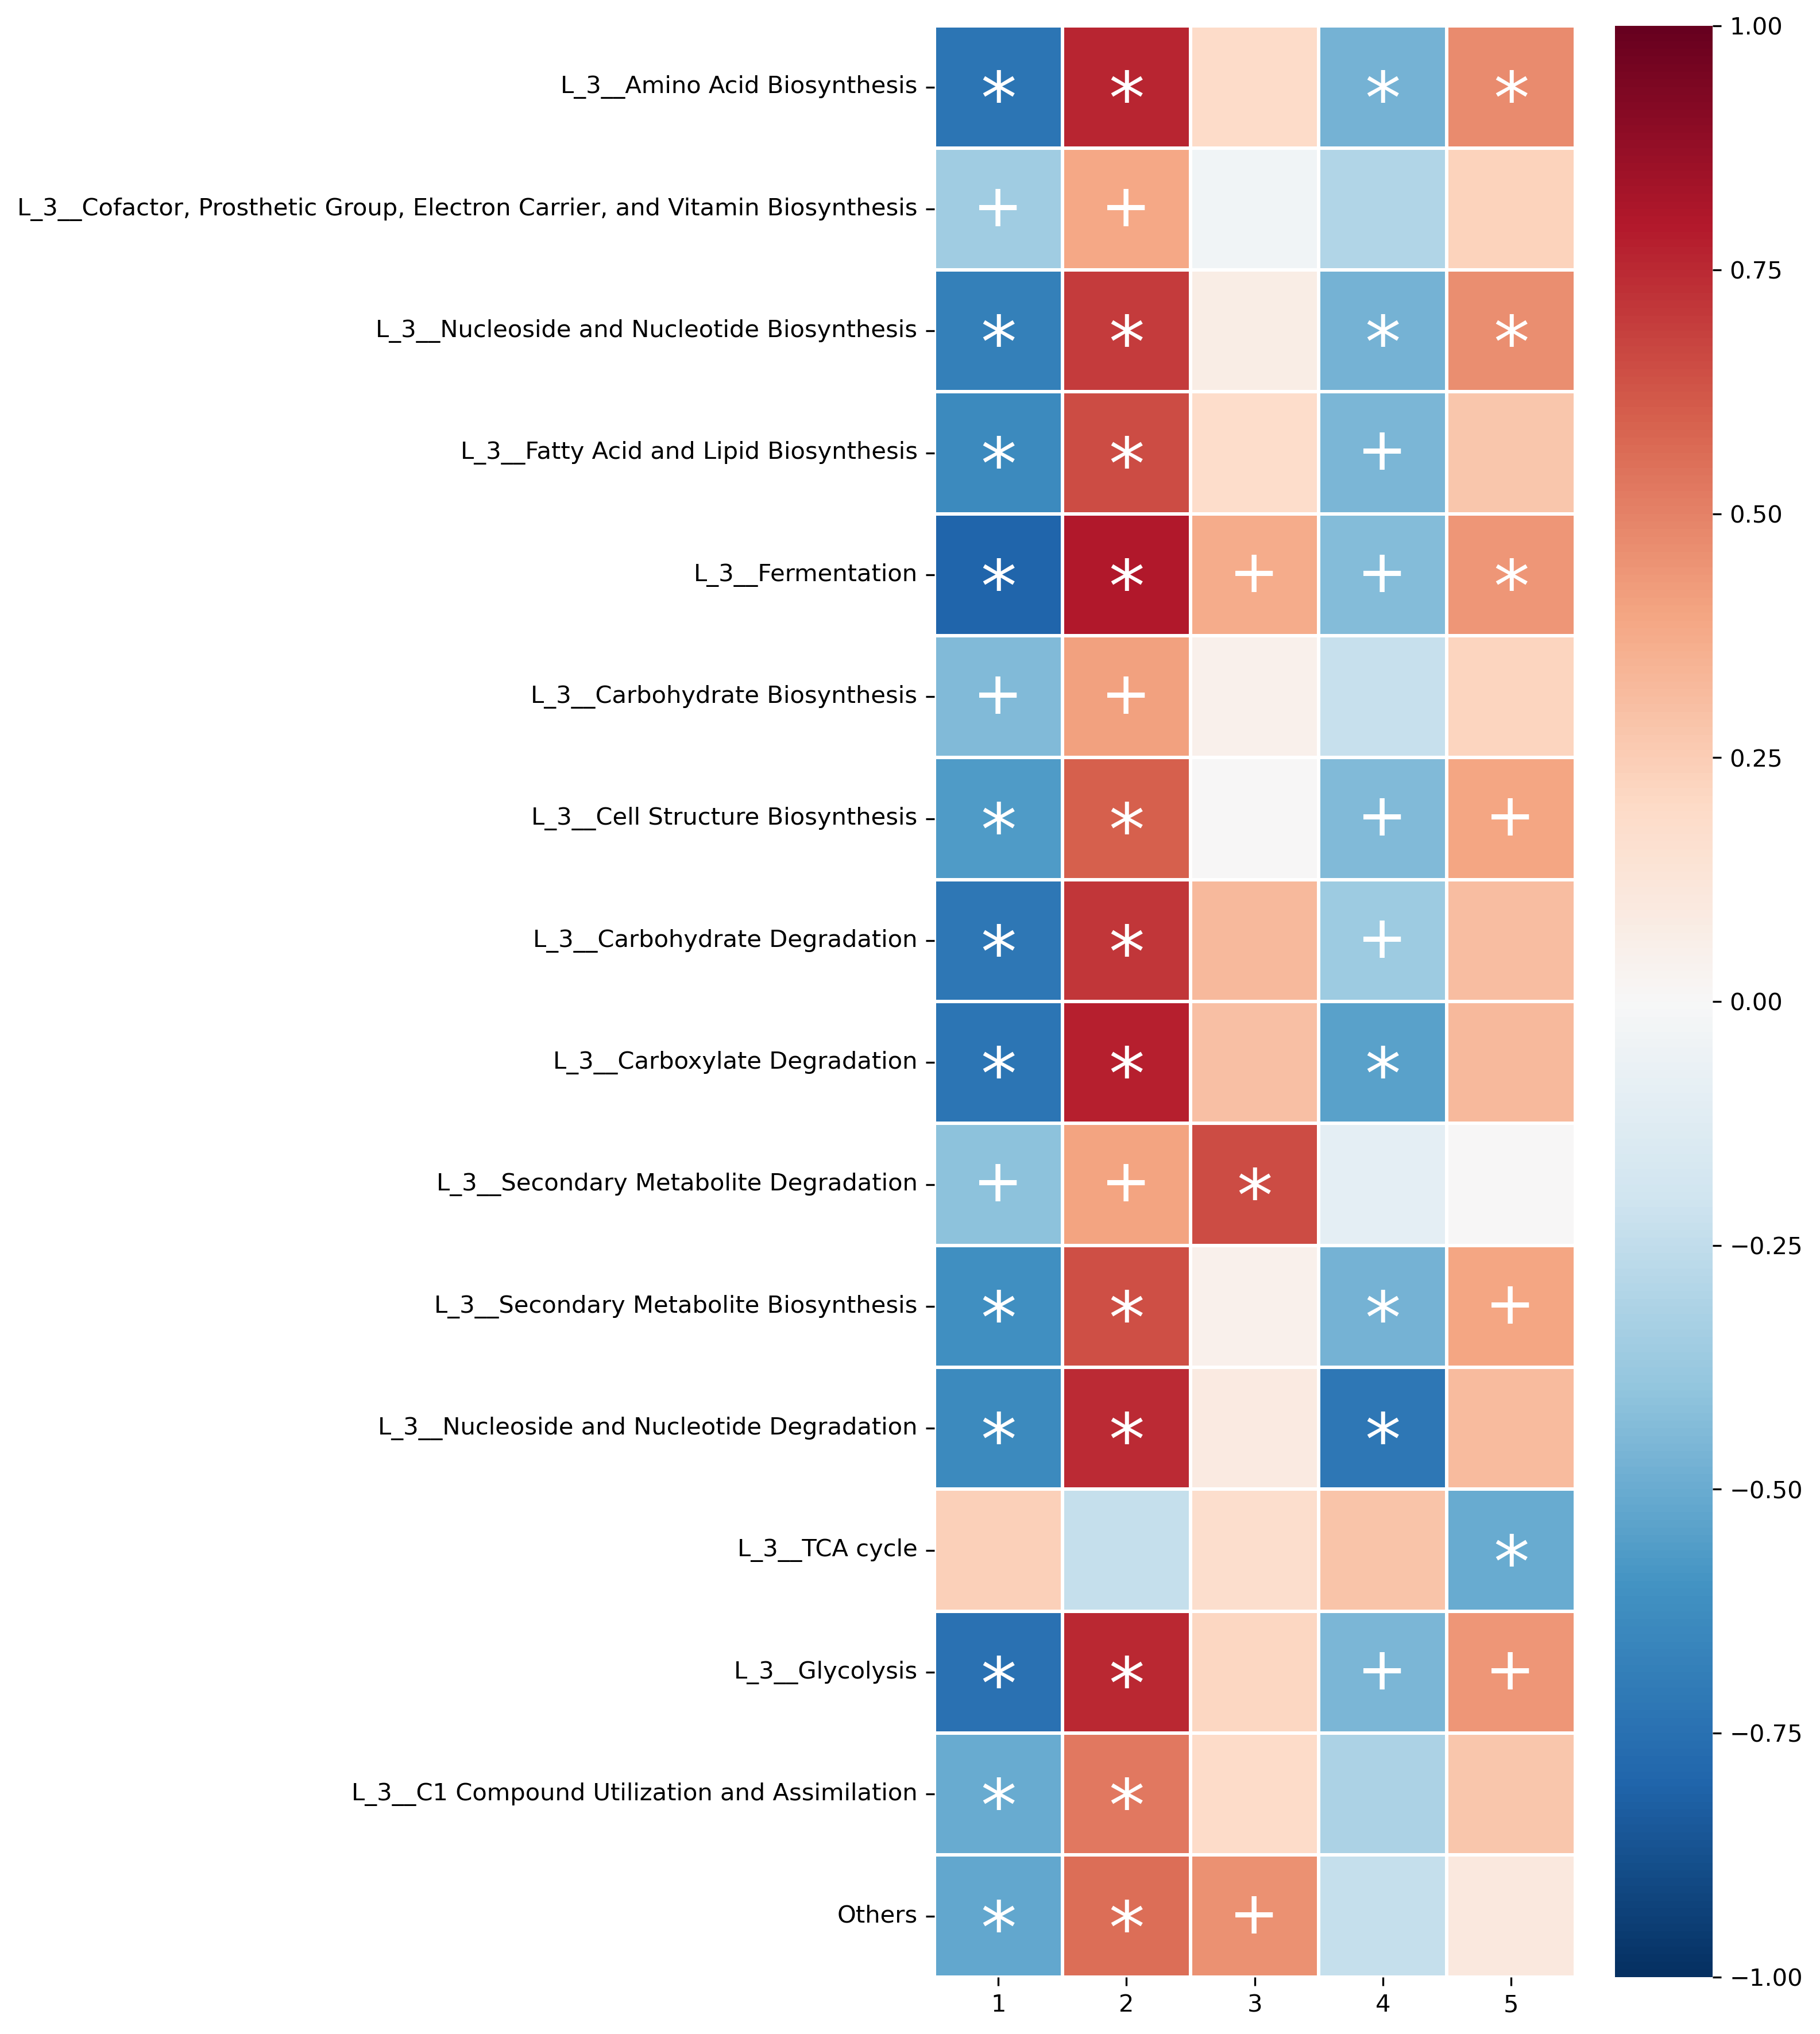

In [251]:
fig = plt.figure(figsize=(6, 15), dpi=300)
g = sns.heatmap(r_res.T, cmap='RdBu_r', vmin=-1, vmax=1, cbar=True, lw=1)
#_ = h.set_ylim(r_res_.T.shape[0], -0.0)

### -log P-value
for i in range(len(r_res.index)): # 5
    for j in range(len(r_res.columns)):
        p = p_res.loc[r_res.index[i], r_res.columns[j]]
        _ = g.annotate('*' if p<=0.01 else ('+' if p<=0.05 else ''), 
                       (i+(0.36 if p<=0.01 else 0.3), j+(0.8 if p<=0.01 else 0.64)), 
                       fontsize=(30 if p<0.01 else 25), color='white')
fig.savefig('../Results_0609/6.3. TcGSA_ASV2Pathway_top15.pdf', dpi=300)

# enrichment fdr<=0.05, correlation r>=r_threshold and p<=0.05

In [66]:
corr_r = pd.read_csv('../Results_0609/6.3. TcGSA_ASV2Pathway_corr.csv', index_col=0).T
corr_p = pd.read_csv('../Results_0609/6.3. TcGSA_ASV2Pathway_pval.csv', index_col=0).T
corr_r.shape
corr_r.head(1)

(412, 5)

1         2         3         4         5
1CMET2-PWY -0.309524  0.318071 -0.208791 -0.289377  0.245421

In [67]:
enri_r = pd.read_csv('../Results_0609/6.3. TcGSA_PathwayEnrich_OR.csv', index_col=0)
enri_p = pd.read_csv('../Results_0609/6.3. TcGSA_PathwayEnrich_pval.csv', index_col=0)
import statsmodels.stats.multitest as multi
for i in enri_p.columns:
    enri_p[i] = multi.multipletests(enri_p[i], method = 'fdr_bh')[1]
enri_p.head(1)

1    2    3    4    5
PWY-5971  1.0  1.0  1.0  1.0  1.0

In [68]:
overpath = set(corr_r.index)&set(enri_r.index)
len(overpath)
corr_r = corr_r.loc[overpath, :]
corr_r.columns = range(1, 6)
corr_p = corr_p.loc[overpath, :]
corr_p.columns = range(1, 6)
enri_r = enri_r.loc[overpath, :]
enri_r.columns = range(1, 6)
enri_p = enri_p.loc[overpath, :]
enri_p.columns = range(1, 6)

379

In [72]:
r_threshold = 0.5
select_corr_r = corr_r.loc[((enri_p<=0.05)&(corr_r>=r_threshold)&(corr_p<=0.05)).sum(1)>0, :]
select_corr_p = corr_p.loc[((enri_p<=0.05)&(corr_r>=r_threshold)&(corr_p<=0.05)).sum(1)>0, :]
select_enri_p = enri_p.loc[((enri_p<=0.05)&(corr_r>=r_threshold)&(corr_p<=0.05)).sum(1)>0, :]
select_corr_r.shape

(77, 5)

In [73]:
anno = pd.read_csv('../Data/16S/picrust2_out_pipeline/pathways_out/MetaCYC_annotation.tsv', sep='\t', index_col=0)
anno = anno.loc[select_corr_r.index, :]
anno = anno.drop_duplicates()
anno.head(2)

Level  \
3-HYDROXYPHENYLACETATE-DEGRADATION-PWY      4   
P562-PWY                                    6   

                                                                               Annotation  
3-HYDROXYPHENYLACETATE-DEGRADATION-PWY  L_1__Pathways;L_2__Degradation/Utilization/Ass...  
P562-PWY                                L_1__Pathways;L_2__Degradation/Utilization/Ass...

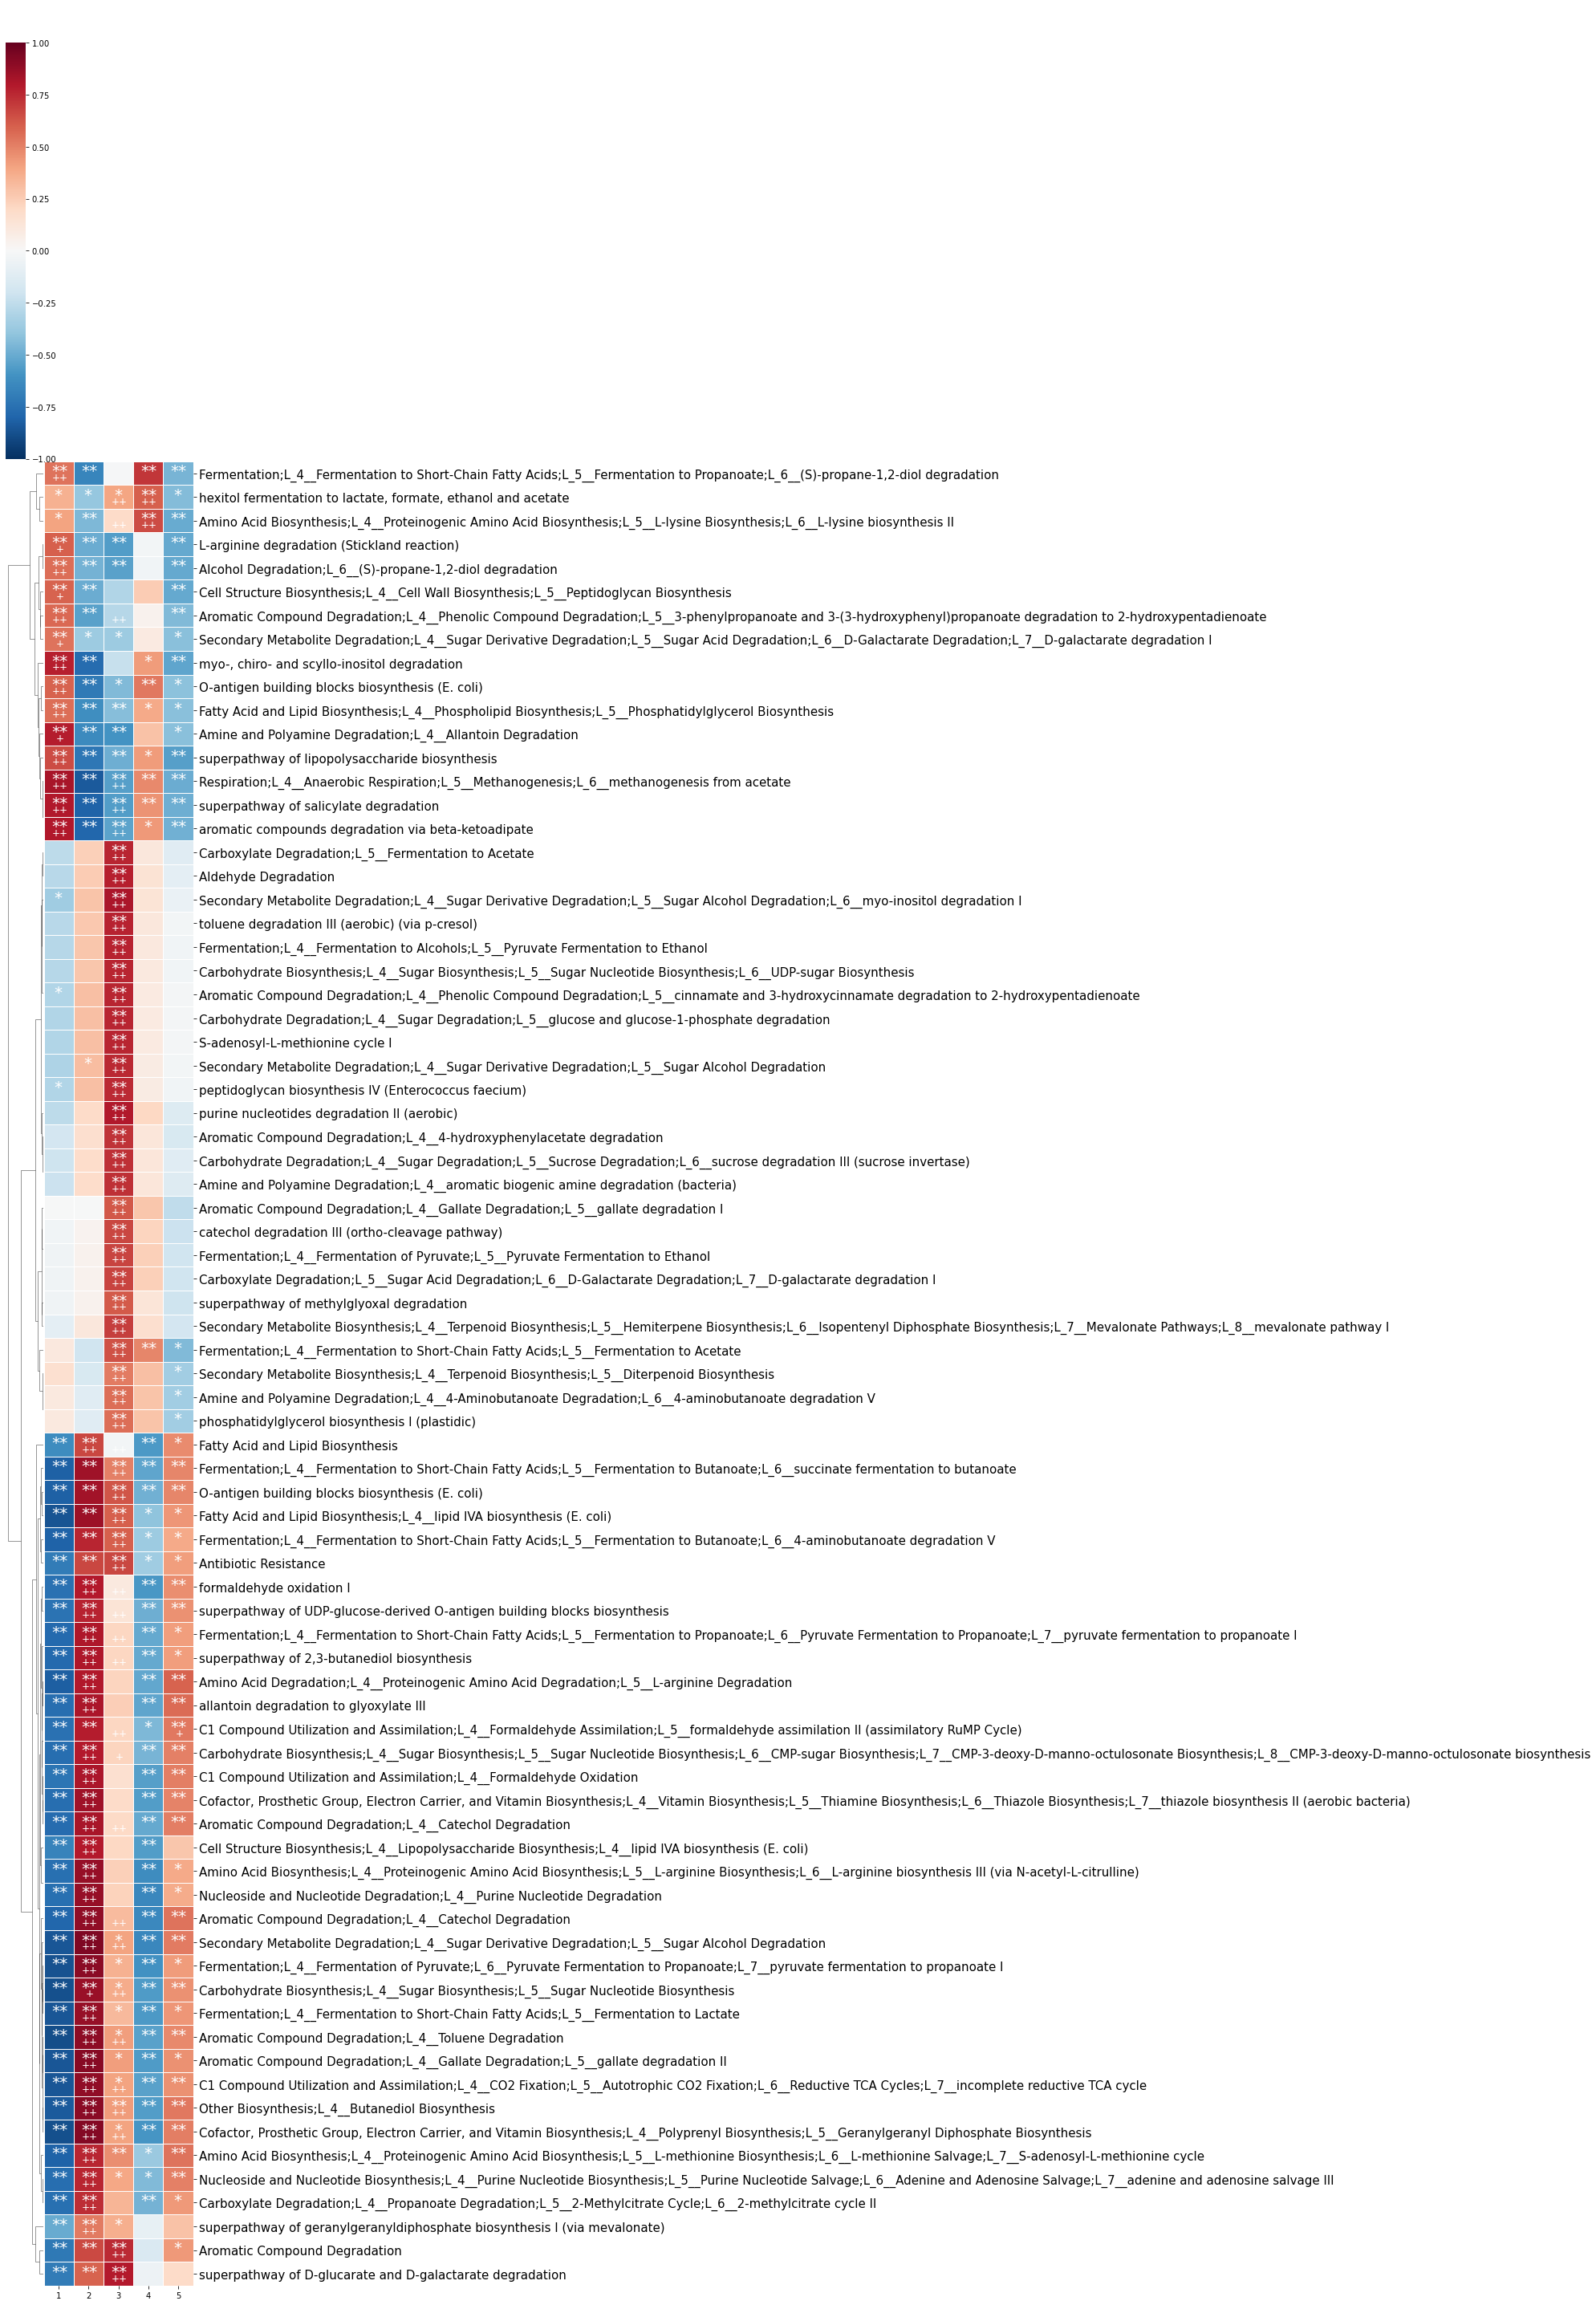

In [94]:
g = sns.clustermap(select_corr_r, cmap='RdBu_r', vmin=-1, vmax=1, cbar=True, lw=1, 
                   col_cluster=False, figsize=(7, 40))
#_ = h.set_ylim(r_res_.T.shape[0], -0.0)
_ = g.ax_heatmap.set_ylim(select_corr_r.shape[0], -0.0)
yticklabels = np.array(select_corr_r.index)[g.dendrogram_row.reordered_ind]
yticklabels_ = [i.split(';L_3__')[1] for i in np.array(anno['Annotation'])[g.dendrogram_row.reordered_ind]]
_ = g.ax_heatmap.set_yticklabels(yticklabels_, fontsize=15)
xticklabels = [1, 2, 3, 4, 5]

### -log P-value
for mf in range(len(xticklabels)):
    for af in range(len(yticklabels)):
        p = select_corr_p.loc[yticklabels[af], xticklabels[mf]]
        _ = g.ax_heatmap.annotate('**' if p<=0.01 else ('*' if p<=0.05 else ''), 
                                  (mf+(0.25 if p<=0.01 else 0.35), af+0.6), fontsize=20, color='white')
        p = select_enri_p.loc[yticklabels[af], xticklabels[mf]]
        _ = g.ax_heatmap.annotate('++' if p<=0.01 else ('+' if p<=0.05 else ''), 
                                  (mf+(0.27 if p<=0.01 else 0.4), af+0.8), fontsize=12, color='white')
g.savefig('../Results_0609/6.3. TcGSA_enrich_corrlation.pdf', dpi=300)